In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
opsd_daily=pd.read_csv("2012_2013_gc_customerID_11.csv", parse_dates=True)
weather=pd.read_csv("2012_2013_customerID_11.csv", parse_dates=True)

In [ ]:
print(opsd_daily.shape)
print(weather.shape)

(17519, 2)
(17519, 15)


In [ ]:
opsd_daily.head()

date  value
0  2012-07-01 00:30:00  0.567
1  2012-07-01 01:00:00  0.547
2  2012-07-01 01:30:00  0.613
3  2012-07-01 02:00:00  0.519
4  2012-07-01 02:30:00  0.314

In [ ]:
weather.head()

zip_code                 date  temperature  apparentTemperature  \
0      2026  2012-07-01 00:30:00        10.77                10.77   
1      2026  2012-07-01 01:00:00        10.21                10.21   
2      2026  2012-07-01 01:30:00        10.21                10.21   
3      2026  2012-07-01 02:00:00         9.48                 9.48   
4      2026  2012-07-01 02:30:00         9.48                 9.48   

   precipIntensity  precipProbability  dewPoint  humidity  pressure  \
0              0.0                0.0      5.48      0.70    1014.8   
1              0.0                0.0      5.52      0.73       0.0   
2              0.0                0.0      5.52      0.73       0.0   
3              0.0                0.0      5.22      0.75       0.0   
4              0.0                0.0      5.22      0.75       0.0   

   windSpeed  windGust  windBearing  uvIndex  cloudCover  visibility  
0       0.75      0.75          294        0        0.78       9.988  
1       0.21      0.61          289        0        1.00       0.000  
2       0.21      0.61          289        0        1.00       0.000  
3       0.33      0.95          284        0        0.88       0.000  
4       0.33      0.95          284        0        0.88       0.000

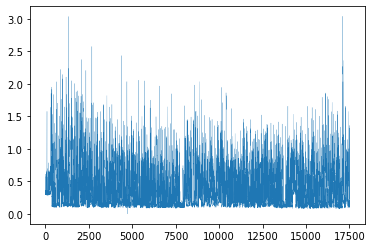

In [ ]:
opsd_daily['value'].plot(linewidth=0.2);

In [ ]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

value  Year  Month Weekday Name
date                                                
2012-11-28 07:00:00  0.152  2012     11    Wednesday
2013-01-20 05:00:00  0.127  2013      1       Sunday
2013-02-17 21:30:00  0.490  2013      2       Sunday
2012-12-27 19:00:00  1.306  2012     12     Thursday
2012-12-08 13:30:00  0.827  2012     12     Saturday

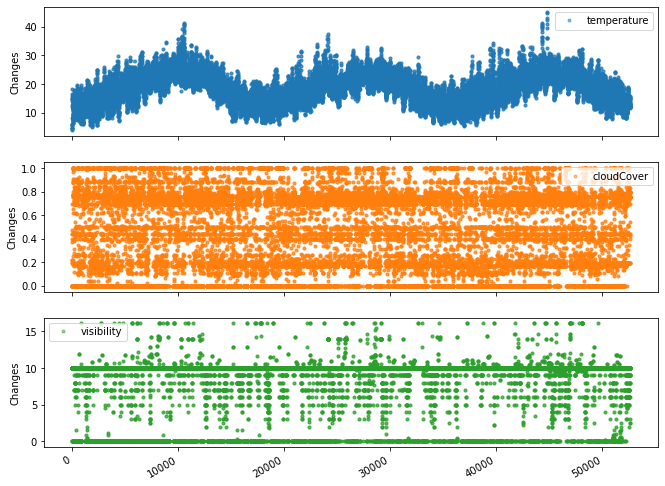

In [ ]:
cols_plot = ['temperature', 'cloudCover', 'visibility']
axes = weather[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Changes')

In [ ]:
weather.drop(columns=["zip_code"], inplace=True)

In [ ]:
df=weather.merge(opsd_daily, on='date', how='left')

In [ ]:
df.head()

date  temperature  apparentTemperature  precipIntensity  \
0  2012-07-01 00:30:00        10.77                10.77              0.0   
1  2012-07-01 01:00:00        10.21                10.21              0.0   
2  2012-07-01 01:30:00        10.21                10.21              0.0   
3  2012-07-01 02:00:00         9.48                 9.48              0.0   
4  2012-07-01 02:30:00         9.48                 9.48              0.0   

   precipProbability  dewPoint  humidity  pressure  windSpeed  windGust  \
0                0.0      5.48      0.70    1014.8       0.75      0.75   
1                0.0      5.52      0.73       0.0       0.21      0.61   
2                0.0      5.52      0.73       0.0       0.21      0.61   
3                0.0      5.22      0.75       0.0       0.33      0.95   
4                0.0      5.22      0.75       0.0       0.33      0.95   

   windBearing  uvIndex  cloudCover  visibility  value  
0          294        0        0.78       9.988  0.567  
1          289        0        1.00       0.000  0.547  
2          289        0        1.00       0.000  0.613  
3          284        0        0.88       0.000  0.519  
4          284        0        0.88       0.000  0.314

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
df = df.rename(columns={'value':'GC'})

In [ ]:
df

temperature  apparentTemperature  precipIntensity  \
date                                                                     
2012-07-01 00:30:00        10.77                10.77           0.0000   
2012-07-01 01:00:00        10.21                10.21           0.0000   
2012-07-01 01:30:00        10.21                10.21           0.0000   
2012-07-01 02:00:00         9.48                 9.48           0.0000   
2012-07-01 02:30:00         9.48                 9.48           0.0000   
...                          ...                  ...              ...   
2013-06-30 21:30:00        12.70                12.70           0.0713   
2013-06-30 22:00:00        12.21                12.21           0.0056   
2013-06-30 22:30:00        12.21                12.21           0.0056   
2013-06-30 23:00:00        11.70                11.70           0.0000   
2013-06-30 23:30:00        11.70                11.70           0.0000   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2012-07-01 00:30:00               0.00      5.48      0.70    1014.8   
2012-07-01 01:00:00               0.00      5.52      0.73       0.0   
2012-07-01 01:30:00               0.00      5.52      0.73       0.0   
2012-07-01 02:00:00               0.00      5.22      0.75       0.0   
2012-07-01 02:30:00               0.00      5.22      0.75       0.0   
...                                ...       ...       ...       ...   
2013-06-30 21:30:00               0.31     11.49      0.92    1024.7   
2013-06-30 22:00:00               0.04     11.12      0.93    1024.7   
2013-06-30 22:30:00               0.04     11.12      0.93    1024.7   
2013-06-30 23:00:00               0.00     10.52      0.92       0.0   
2013-06-30 23:30:00               0.00     10.52      0.92       0.0   

                     windSpeed  windGust  windBearing  uvIndex  cloudCover  \
date                                                                         
2012-07-01 00:30:00       0.75      0.75          294        0        0.78   
2012-07-01 01:00:00       0.21      0.61          289        0        1.00   
2012-07-01 01:30:00       0.21      0.61          289        0        1.00   
2012-07-01 02:00:00       0.33      0.95          284        0        0.88   
2012-07-01 02:30:00       0.33      0.95          284        0        0.88   
...                        ...       ...          ...      ...         ...   
2013-06-30 21:30:00       1.48      1.74          237        0        0.42   
2013-06-30 22:00:00       1.42      2.11          248        0        0.40   
2013-06-30 22:30:00       1.42      2.11          248        0        0.40   
2013-06-30 23:00:00       1.05      3.44          261        0        0.19   
2013-06-30 23:30:00       1.05      3.44          261        0        0.19   

                     visibility     GC  
date                                    
2012-07-01 00:30:00       9.988  0.567  
2012-07-01 01:00:00       0.000  0.547  
2012-07-01 01:30:00       0.000  0.613  
2012-07-01 02:00:00       0.000  0.519  
2012-07-01 02:30:00       0.000  0.314  
...                         ...    ...  
2013-06-30 21:30:00      10.003  0.404  
2013-06-30 22:00:00      10.003  0.747  
2013-06-30 22:30:00      10.003  0.656  
2013-06-30 23:00:00      10.003  0.291  
2013-06-30 23:30:00      10.003  0.230  

[17519 rows x 14 columns]

In [ ]:
df.isna().sum()

temperature            0
apparentTemperature    0
precipIntensity        0
precipProbability      0
dewPoint               0
humidity               0
pressure               0
windSpeed              0
windGust               0
windBearing            0
uvIndex                0
cloudCover             0
visibility             0
GC                     0
dtype: int64

In [ ]:
#Export into CSV
# df.to_csv("2012_2013_merged_customerID_11.csv")

## Modeling data

In [18]:
# data = pd.read_csv("2012_2013_merged_customerID_11.csv", index_col = "date", parse_dates=True)  

In [47]:
data = pd.read_csv("https://raw.githubusercontent.com/bbaigalaa/Predict-energy-consumption/master/dataset/2010_2013_merged_customerID_73.csv",
               parse_dates=["date"],
               index_col="date")

In [48]:
data.head()

temperature  apparentTemperature  precipIntensity  \
date                                                                     
2010-07-01 00:00:00         7.39                 4.65              0.0   
2010-07-01 00:30:00         7.39                 4.65              0.0   
2010-07-01 01:00:00         5.11                 1.78              0.0   
2010-07-01 01:30:00         5.11                 1.78              0.0   
2010-07-01 02:00:00         5.05                 2.13              0.0   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2010-07-01 00:00:00                0.0      2.84      0.73    1022.6   
2010-07-01 00:30:00                0.0      2.84      0.73    1022.6   
2010-07-01 01:00:00                0.0      0.46      0.72    1022.7   
2010-07-01 01:30:00                0.0      0.46      0.72    1022.7   
2010-07-01 02:00:00                0.0      0.12      0.70       0.0   

                     windSpeed  windGust  windBearing  uvIndex  cloudCover  \
date                                                                         
2010-07-01 00:00:00       4.29      4.29          299        0         0.0   
2010-07-01 00:30:00       4.29      4.29          299        0         0.0   
2010-07-01 01:00:00       4.40      4.40          292        0         0.0   
2010-07-01 01:30:00       4.40      4.40          292        0         0.0   
2010-07-01 02:00:00       3.64      3.64          291        0         0.0   

                     visibility   GG     GC  
date                                         
2010-07-01 00:00:00      10.003  0.0  0.112  
2010-07-01 00:30:00      10.003  0.0  1.685  
2010-07-01 01:00:00      10.003  0.0  0.623  
2010-07-01 01:30:00      10.003  0.0  0.072  
2010-07-01 02:00:00      10.003  0.0  1.172

In [8]:
data.shape

(52602, 15)

In [9]:
data["GC"].value_counts()

0.114    381
0.112    346
0.113    341
0.117    338
0.116    337
        ... 
1.495      1
2.195      1
0.426      1
1.656      1
2.165      1
Name: GC, Length: 2493, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52602 entries, 2010-07-01 00:00:00 to 2013-06-30 23:30:00
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature          52602 non-null  float64
 1   apparentTemperature  52602 non-null  float64
 2   precipIntensity      52602 non-null  float64
 3   precipProbability    52602 non-null  float64
 4   dewPoint             52602 non-null  float64
 5   humidity             52602 non-null  float64
 6   pressure             52602 non-null  float64
 7   windSpeed            52602 non-null  float64
 8   windGust             52602 non-null  float64
 9   windBearing          52602 non-null  int64  
 10  uvIndex              52602 non-null  int64  
 11  cloudCover           52602 non-null  float64
 12  visibility           52602 non-null  float64
 13  GG                   52602 non-null  float64
 14  GC                   52602 non-null  float64
dtypes

In [11]:
# Basic statistics :

data.describe()

temperature  apparentTemperature  precipIntensity  precipProbability  \
count  52602.000000         52602.000000     52602.000000       52602.000000   
mean      17.731194            17.848150         0.158033           0.065127   
std        5.141398             5.503694         1.170303           0.227029   
min        1.340000             0.390000         0.000000           0.000000   
25%       14.120000            14.130000         0.000000           0.000000   
50%       17.910000            17.990000         0.000000           0.000000   
75%       21.220000            21.490000         0.000000           0.000000   
max       43.510000            44.660000        63.981000           1.000000   

           dewPoint      humidity      pressure     windSpeed      windGust  \
count  52602.000000  52602.000000  52602.000000  52602.000000  52602.000000   
mean      13.099675      0.764228    683.888168      2.481625      3.970827   
std        5.281887      0.165069    477.547619      1.994851      2.847430   
min       -8.230000      0.120000      0.000000      0.000000      0.000000   
25%        9.420000      0.660000      0.000000      1.040000      1.850000   
50%       13.510000      0.790000   1013.000000      2.040000      3.480000   
75%       17.500000      0.900000   1019.500000      3.460000      5.400000   
max       27.220000      1.000000   1037.400000     18.750000     20.310000   

        windBearing       uvIndex    cloudCover    visibility            GG  \
count  52602.000000  52602.000000  52602.000000  52602.000000  52602.000000   
mean     178.755865      1.228661      0.437368      9.613921      0.160556   
std      105.319787      2.208594      0.403147      1.709133      0.251274   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       88.000000      0.000000      0.000000     10.003000      0.000000   
50%      172.000000      0.000000      0.440000     10.003000      0.000000   
75%      290.000000      2.000000      0.750000     10.003000      0.250000   
max      359.000000     12.000000      1.000000     16.093000      0.863000   

                 GC  
count  52602.000000  
mean       0.295128  
std        0.362514  
min        0.000000  
25%        0.113000  
50%        0.164000  
75%        0.291000  
max        2.954000

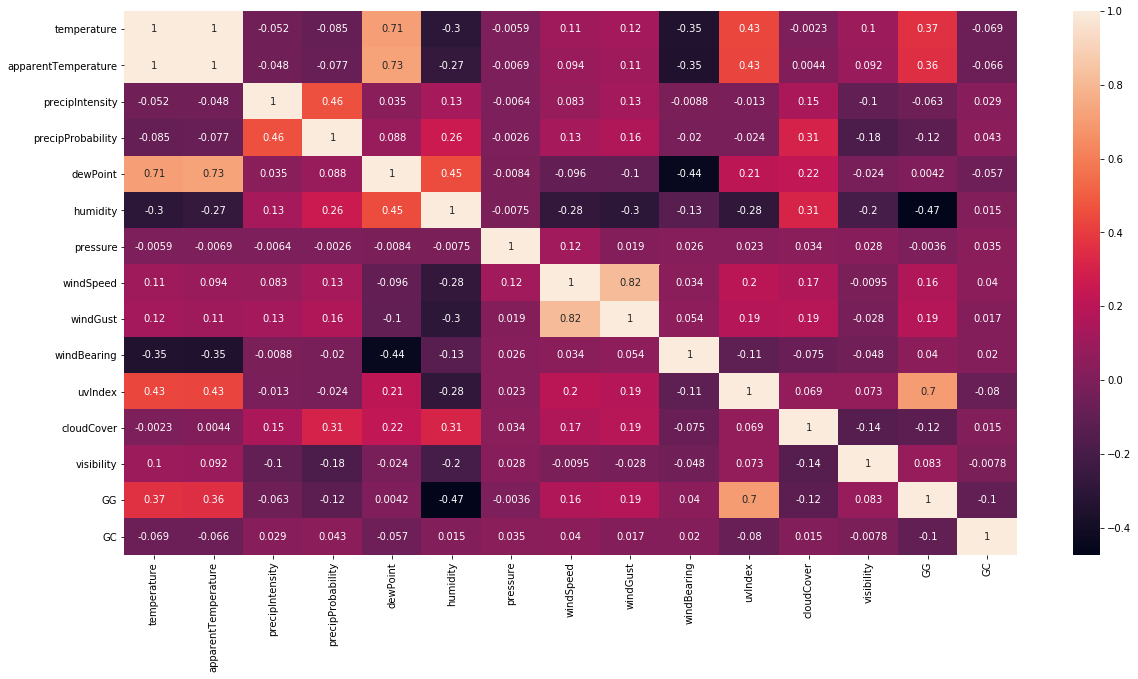

In [12]:
# Checking futures correlation

c = data.corr()

plt.subplots(figsize=(20,10))
sns.heatmap(c, annot=True)

In [13]:
c = data.corr()
abs(c['GC']).sort_values(ascending = False)

GC                     1.000000
GG                     0.099566
uvIndex                0.080237
temperature            0.069263
apparentTemperature    0.066153
dewPoint               0.056954
precipProbability      0.043485
windSpeed              0.040079
pressure               0.035378
precipIntensity        0.028946
windBearing            0.019565
windGust               0.016599
humidity               0.015200
cloudCover             0.014746
visibility             0.007791
Name: GC, dtype: float64

### To verify missing value percentage

In [14]:
100 * data.isnull().sum() / data.shape[0]

temperature            0.0
apparentTemperature    0.0
precipIntensity        0.0
precipProbability      0.0
dewPoint               0.0
humidity               0.0
pressure               0.0
windSpeed              0.0
windGust               0.0
windBearing            0.0
uvIndex                0.0
cloudCover             0.0
visibility             0.0
GG                     0.0
GC                     0.0
dtype: float64

Every thing is ok, there is no missing value

In [9]:
# data["date"] = pd.to_datetime(data["date"])
# data["date"]

In [15]:

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

figure = go.Scatter(x=data.index,
                    y=data.GC,
                    name = "Evolution de la conso par mois",
                    line = dict(color = 'blue'),
                    opacity = 0.5)

layout = dict(title='Evolution de la conso par mois',)

fig = dict(data=[figure], layout=layout)
iplot(fig)

## Monthly data

In [16]:
# july_data_2012 = data["2012-07"]
# july_data_2012.head(10)

In [14]:
# monthly_data = data.date.index.month
# Weekday_data =  data.date.index.day_name

In [17]:
# july_data_2012.describe()

In [18]:
# fig = plt.figure(figsize=(20,10))
# sns.lineplot(x= july_data_2012.index, y="GC", data = july_data_2012)
# fig.show()

In [16]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

figure = go.Scatter(x=july_data_2012.index,
                    y=july_data_2012.GC,
                    name = "Evolution de la conso par mois",
                    line = dict(color = 'blue'),
                    opacity = 0.5)

layout = dict(title='Evolution de la conso par mois',)

fig = dict(data=[figure], layout=layout)
iplot(fig)

In [17]:
fig = go.Figure([{
    'x': july_data_2012.index,
    'y': july_data_2012.GC,
    'name': col
}  for col in july_data_2012])

fig.show()

In [157]:
# data = data.iloc[:, 1:]
# data.head()

In [49]:
# Separate target variable Y from features X
data = data.drop('GG',axis = 1)
target_name = 'GC'


Y = data[target_name]
X = data.drop(target_name, axis=1)

In [177]:
# # Convert pandas DataFrames to numpy arrays before using scikit-learn
# print("Convert pandas DataFrames to numpy arrays...")
# X = X.values
# Y = Y.tolist()
# print("...Done")
# print(X[0:5,:])
# print()
# print(Y[0:5])

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [51]:
# Data normalization

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns = X_train.columns, index= X_train.index)
display(X_train)

#sc_x.fit(X_train)
#X_train= sc_x.transform(X_train)

print("-------------")
X_test = pd.DataFrame(sc_x.transform(X_test), columns = X_test.columns, index=X_test.index)
display(X_test)

temperature  apparentTemperature  precipIntensity  \
date                                                                     
2012-08-12 10:00:00    -0.701569            -0.676590        -0.131677   
2011-08-11 15:00:00    -0.362862            -0.360209        -0.131677   
2011-09-29 16:00:00     0.406042             0.358013        -0.131677   
2011-02-22 22:00:00     0.555930             0.498021        -0.131677   
2012-12-11 00:30:00     0.018670             0.068906         2.907701   
...                          ...                  ...              ...   
2012-03-14 05:30:00     0.207490             0.238006        -0.131677   
2010-07-09 01:00:00    -1.741049            -1.896658        -0.131677   
2013-05-12 11:30:00     0.326232             0.283463        -0.131677   
2012-03-20 16:00:00     1.099029             1.063507        -0.126240   
2012-02-12 04:00:00    -0.629545            -0.578403        -0.131677   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2012-08-12 10:00:00          -0.286044 -0.827011 -0.387622  0.709292   
2011-08-11 15:00:00          -0.286044 -1.516275 -1.660091  0.675096   
2011-09-29 16:00:00          -0.286044 -1.431064 -2.266028  0.654326   
2011-02-22 22:00:00          -0.286044  0.112206 -0.690591 -1.439840   
2012-12-11 00:30:00           3.592579  0.841236  1.309002  0.711180   
...                                ...       ...       ...       ...   
2012-03-14 05:30:00          -0.286044  0.845023  0.945440  0.697963   
2010-07-09 01:00:00          -0.286044 -0.815650  1.430190  0.713488   
2013-05-12 11:30:00          -0.286044  0.392457 -0.024060  0.717264   
2012-03-20 16:00:00          -0.153818  1.009765 -0.145247 -1.439840   
2012-02-12 04:00:00          -0.286044  0.265587  1.430190 -1.439840   

                     windSpeed  windGust  windBearing   uvIndex  cloudCover  \
date                                                                          
2012-08-12 10:00:00   0.943389  2.039805     0.066818  0.349211    0.780604   
2011-08-11 15:00:00  -0.415085 -0.279747    -0.312925 -0.103867    0.457720   
2011-09-29 16:00:00   0.002520  1.754268     0.987694 -0.103867    0.780604   
2011-02-22 22:00:00   0.198744  0.615643    -0.512290 -0.556945    0.780604   
2012-12-11 00:30:00   1.803756  1.352400    -0.037612 -0.556945    1.401535   
...                        ...       ...          ...       ...         ...   
2012-03-14 05:30:00  -1.144636 -1.326718    -1.680000 -0.556945   -1.082189   
2010-07-09 01:00:00  -0.012574 -0.533558     1.291488 -0.556945    0.780604   
2013-05-12 11:30:00  -0.903129 -0.794419     1.215540  0.802289   -0.610282   
2012-03-20 16:00:00  -0.410053 -0.184568    -1.053424  0.802289    0.780604   
2012-02-12 04:00:00  -0.198735 -0.663989     0.968707 -0.556945    0.780604   

                     visibility  
date                             
2012-08-12 10:00:00    0.225904  
2011-08-11 15:00:00    0.225904  
2011-09-29 16:00:00    0.225904  
2011-02-22 22:00:00    0.225904  
2012-12-11 00:30:00   -0.281365  
...                         ...  
2012-03-14 05:30:00    0.225904  
2010-07-09 01:00:00    0.225904  
2013-05-12 11:30:00    1.392623  
2012-03-20 16:00:00    0.225904  
2012-02-12 04:00:00    0.225904  

[42081 rows x 13 columns]

-------------


temperature  apparentTemperature  precipIntensity  \
date                                                                     
2010-08-01 01:30:00    -1.340051            -1.272987        -0.131677   
2010-07-11 02:30:00    -1.774141            -1.678464        -0.131677   
2012-12-15 16:00:00     0.966660             0.945318        -0.131677   
2011-02-15 00:30:00     0.633793             0.574389        -0.131677   
2010-07-31 22:00:00    -1.077261            -1.027519        -0.131677   
...                          ...                  ...              ...   
2012-04-14 06:30:00    -0.538055            -0.514763        -0.131677   
2011-12-22 21:00:00     0.347644             0.356195        -0.131677   
2012-08-13 19:00:00    -1.116193            -1.063884        -0.131677   
2011-12-06 00:30:00    -0.658744            -0.636588        -0.131677   
2012-08-31 22:30:00    -1.579482            -1.685737        -0.131677   

                     precipProbability  dewPoint  humidity  pressure  \
date                                                                   
2010-08-01 01:30:00          -0.286044 -1.179218 -0.024060  0.699222   
2010-07-11 02:30:00          -0.286044 -0.847840  1.430190 -1.439840   
2012-12-15 16:00:00          -0.286044  1.028701  0.036534 -1.439840   
2011-02-15 00:30:00          -0.286044  0.492817 -0.266435  0.706775   
2010-07-31 22:00:00          -0.286044 -1.105368 -0.266435  0.697544   
...                                ...       ...       ...       ...   
2012-04-14 06:30:00          -0.286044  0.220141  1.127221  0.716425   
2011-12-22 21:00:00          -0.286044  0.809045  0.642471  0.691669   
2012-08-13 19:00:00          -0.286044 -0.705822  0.460690  0.704677   
2011-12-06 00:30:00          -0.286044 -0.393380  0.218315  0.700271   
2012-08-31 22:30:00          -0.286044 -1.516275 -0.205841  0.697963   

                     windSpeed  windGust  windBearing   uvIndex  cloudCover  \
date                                                                          
2010-08-01 01:30:00   1.406277  0.460536     0.968707 -0.556945   -1.082189   
2010-07-11 02:30:00  -1.084259 -0.893124     0.607951 -0.556945   -1.082189   
2012-12-15 16:00:00  -1.099353 -1.294991    -0.569252  1.255367    0.780604   
2011-02-15 00:30:00   1.366026  0.925856    -0.094573 -0.556945    1.401535   
2010-07-31 22:00:00   1.250304  0.351256     0.949720 -0.556945   -1.082189   
...                        ...       ...          ...       ...         ...   
2012-04-14 06:30:00  -0.711937 -1.023554     1.196553 -0.556945   -1.082189   
2011-12-22 21:00:00  -0.168547 -0.642838    -0.797097 -0.556945    0.780604   
2012-08-13 19:00:00  -1.174824 -1.347869    -1.509115 -0.556945   -0.610282   
2011-12-06 00:30:00   0.098117  0.703771     0.199728 -0.556945    0.010649   
2012-08-31 22:30:00  -0.128296  0.478161     0.408586 -0.556945    0.780604   

                     visibility  
date                             
2010-08-01 01:30:00    0.225904  
2010-07-11 02:30:00    0.225904  
2012-12-15 16:00:00    0.225904  
2011-02-15 00:30:00    0.225904  
2010-07-31 22:00:00    0.225904  
...                         ...  
2012-04-14 06:30:00    0.217057  
2011-12-22 21:00:00    0.225904  
2012-08-13 19:00:00    0.225904  
2011-12-06 00:30:00    0.225904  
2012-08-31 22:30:00    0.225904  

[10521 rows x 13 columns]

In [164]:
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# X_train = sc_x.fit_transform(X_train)
# X_test = sc_x.transform(X_test)

### Stat model

In [52]:
import statsmodels.api as sm

model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GC   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     56.47
Date:                Thu, 27 Aug 2020   Prob (F-statistic):          3.75e-147
Time:                        12:06:25   Log-Likelihood:                -16588.
No. Observations:               42081   AIC:                         3.320e+04
Df Residuals:                   42067   BIC:                         3.332e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2947      0.002    168.442      0.000       0.291       0.298
temperature            -0.2176      0.025     -8.546      0.000      -0.268      -0.168
apparentTemperature     0.2361      0.023     10.076      0.000       0.190       0.282
precipIntensity         0.0048      0.002      2.419      0.016       0.001       0.009
precipProbability       0.0093      0.002      4.412      0.000       0.005       0.013
dewPoint               -0.0428      0.013     -3.418      0.001      -0.067      -0.018
humidity                0.0145      0.009      1.551      0.121      -0.004       0.033
pressure                0.0103      0.002      5.777      0.000       0.007       0.014
windSpeed               0.0334      0.003     10.684      0.000       0.027       0.040
windGust               -0.0191      0.003     -6.047      0.000      -0.025      -0.013
windBearing            -0.0047      0.002     -2.355      0.019      -0.009      -0.001
uvIndex                -0.0263      0.002    -13.036      0.000      -0.030      -0.022
cloudCover              0.0057      0.002      2.854      0.004       0.002       0.010
visibility              0.0027      0.002      1.458      0.145      -0.001       0.006
==============================================================================
Omnibus:                    25820.116   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           220275.745
Skew:                           2.961   Prob(JB):                         0.00
Kurtosis:                      12.516   Cond. No.                         34.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
model = sm.OLS(Y_test, sm.add_constant(X_test)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GC   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     13.81
Date:                Thu, 27 Aug 2020   Prob (F-statistic):           4.09e-31
Time:                        12:06:36   Log-Likelihood:                -4222.3
No. Observations:               10521   AIC:                             8473.
Df Residuals:                   10507   BIC:                             8574.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2964      0.004     83.983      0.000       0.289       0.303
temperature            -0.1474      0.052     -2.843      0.004      -0.249      -0.046
apparentTemperature     0.2235      0.048      4.684      0.000       0.130       0.317
precipIntensity         0.0016      0.005      0.337      0.736      -0.008       0.011
precipProbability       0.0128      0.004      2.911      0.004       0.004       0.021
dewPoint               -0.0970      0.025     -3.856      0.000      -0.146      -0.048
humidity                0.0654      0.019      3.482      0.000       0.029       0.102
pressure                0.0085      0.004      2.381      0.017       0.001       0.015
windSpeed               0.0349      0.006      5.644      0.000       0.023       0.047
windGust               -0.0157      0.006     -2.498      0.013      -0.028      -0.003
windBearing            -0.0064      0.004     -1.595      0.111      -0.014       0.001
uvIndex                -0.0269      0.004     -6.673      0.000      -0.035      -0.019
cloudCover             -0.0033      0.004     -0.814      0.416      -0.011       0.005
visibility              0.0065      0.004      1.803      0.071      -0.001       0.013
==============================================================================
Omnibus:                     6421.341   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53581.211
Skew:                           2.938   Prob(JB):                         0.00
Kurtosis:                      12.365   Cond. No.                         34.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Model

In [54]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print(" ")

print("Train score : {}".format(regressor.score(X_train, Y_train)))
print(" ")
print("Test score : {}".format(regressor.score(X_test, Y_test)))

 
Train score : 0.017152071059848506
 
Test score : 0.015034696812649462


In [56]:
from sklearn.metrics import r2_score


print("")
print(" R2 = {} ".format(r2_score(Y_test, regressor.predict(X_test))))


 R2 = 0.015034696812649462 


In [57]:
from sklearn.metrics import explained_variance_score

print("")
print(" EVS = {} ".format(explained_variance_score(Y_test, regressor.predict(X_test))))


 EVS = 0.015055951273075019 


In [58]:
from sklearn.metrics import mean_squared_error

print("")
print(" MSE = {} ".format(mean_squared_error(Y_test, regressor.predict(X_test))))


 MSE = 0.13088385878508849 


In [59]:
from sklearn.metrics import mean_absolute_error


print("")
print(" MAE = {} ".format(mean_absolute_error(Y_test, regressor.predict(X_test))))


 MAE = 0.22141434806911764 


In [60]:
regressor.coef_

array([-0.2176225 ,  0.2360774 ,  0.00476101,  0.00934677, -0.04276944,
        0.01452959,  0.01029479,  0.03338709, -0.01912977, -0.00466765,
       -0.02633716,  0.00570212,  0.00268362])

In [61]:
coefs = pd.DataFrame(index=data.columns[:-1], data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

coefficients
temperature             -0.217623
apparentTemperature      0.236077
precipIntensity          0.004761
precipProbability        0.009347
dewPoint                -0.042769
humidity                 0.014530
pressure                 0.010295
windSpeed                0.033387
windGust                -0.019130
windBearing             -0.004668
uvIndex                 -0.026337
cloudCover               0.005702
visibility               0.002684

In [62]:
coefs.sort_values(by="coefficients", ascending=False)

coefficients
apparentTemperature      0.236077
windSpeed                0.033387
humidity                 0.014530
pressure                 0.010295
precipProbability        0.009347
cloudCover               0.005702
precipIntensity          0.004761
visibility               0.002684
windBearing             -0.004668
windGust                -0.019130
uvIndex                 -0.026337
dewPoint                -0.042769
temperature             -0.217623

In [63]:
from sklearn.feature_selection import f_regression

feature_importance = f_regression(X_train, Y_train)


feature_importance

(array([222.49646123, 203.78570665,  35.93612718,  74.28683035,
        159.18464572,   6.43154619,  57.50026155,  66.40115224,
         10.73404587,  19.80593466, 270.78000834,  12.19047241,
          3.10255594]),
 array([3.46962986e-50, 3.99575688e-46, 2.05549124e-09, 6.98627321e-18,
        1.98532531e-36, 1.12146791e-02, 3.44865542e-14, 3.77936768e-16,
        1.05267312e-03, 8.59359203e-06, 1.18762882e-60, 4.80834326e-04,
        7.81767392e-02]))

In [64]:
feature_ranking = pd.DataFrame(columns=data.columns[:-1], data=feature_importance,
                               index=["f-score", "p-value"]).transpose().sort_values(["f-score", "p-value"], ascending=False)
feature_ranking

f-score       p-value
uvIndex              270.780008  1.187629e-60
temperature          222.496461  3.469630e-50
apparentTemperature  203.785707  3.995757e-46
dewPoint             159.184646  1.985325e-36
precipProbability     74.286830  6.986273e-18
windSpeed             66.401152  3.779368e-16
pressure              57.500262  3.448655e-14
precipIntensity       35.936127  2.055491e-09
windBearing           19.805935  8.593592e-06
cloudCover            12.190472  4.808343e-04
windGust              10.734046  1.052673e-03
humidity               6.431546  1.121468e-02
visibility             3.102556  7.817674e-02

C:\Users\FLaude E. BANZA\anaconda3\lib\site-packages\seaborn\axisgrid.py:861: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



<Figure size 1440x576 with 0 Axes>

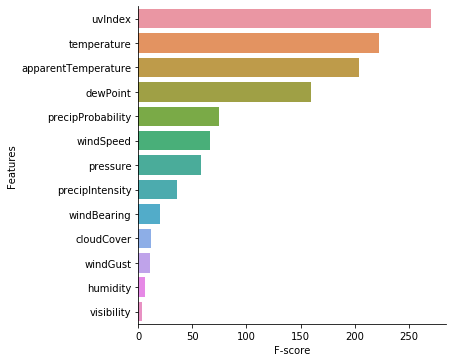

In [65]:
plt.figure(figsize = (20, 8))
ax = sns.catplot(x=feature_ranking.columns[0], y=[index for index in feature_ranking.index],
                 data=feature_ranking, kind="bar", legend=False)
ax.set(xlabel='F-score', ylabel='Features')
plt.show()

### RandomForest Model

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [67]:
print(" ")

print("RF_train score : {}".format(rf_regressor.score(X_train, Y_train)))
print(" ")
print("RF_test score : {}".format(rf_regressor.score(X_test, Y_test)))

 
RF_train score : 0.7656564033021959
 
RF_test score : 0.1910630962589456


In [ ]:
from sklearn.model_selection import GridSearchCV
rf_regressor_grid = RandomForestRegressor()
params = {"n_estimators": range(70, 200, 10),
          "max_depth" : range(9, 30),
          "max_features" : range(5, 10)
          }

regressor = GridSearchCV(cv=10, estimator = rf_regressor_grid, param_grid = params, n_jobs=-1, verbose=3).fit(X_train, Y_train)

Fitting 10 folds for each of 1365 candidates, totalling 13650 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 28.8min


In [28]:
regressor.best_params_

{'max_depth': 9, 'max_features': 9, 'n_estimators': 70}

In [29]:
regressor.best_estimator_.score(X_train, Y_train)

0.8221542312666976

In [30]:
regressor.best_estimator_.score(X_test, Y_test)

0.5317101395123329

### XGboost Model 

In [37]:
!pip install xgboost


In [38]:
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train, Y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [39]:
regressor_xgb.score(X_train, Y_train)

0.3976446595425216

In [40]:
regressor_xgb.score(X_test, Y_test)

0.11600894352048574